In [1]:
## imports
import pandas as pd
import numpy as np
import seaborn as sns

## import the plotnine package
## make sure it's installed
## if not installed, can use
## ! pip install plotnine
# import plotnine
# from plotnine import *

import matplotlib.pyplot as plt

# A few plot types

## Load DC crime data

In [2]:
## load data on 2020 crimes in DC
df = dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
df

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.004500,38.928805,19073083,2020/12/11 05:00:00+00,MIDNIGHT,KNIFE,HOMICIDE,100 - 379 BLOCK OF MICHIGAN AVENUE NE,399610.0,140102.0,...,002302 2,2302.0,Precinct 44,38.928797,-77.004498,NaN,2019/04/29 20:50:27+00,2019/04/29 20:55:58+00,595556840,NaN
1,-77.023981,38.900345,5370,2020/01/17 02:39:05+00,EVENING,OTHERS,THEFT F/AUTO,800 - 899 BLOCK OF 9TH STREET NW,397920.0,136943.0,...,005802 5,5802.0,Precinct 129,38.900337,-77.023979,DOWNTOWN,2020/01/11 02:48:51+00,2020/01/17 02:48:54+00,595560645,NaN
2,-76.972651,38.857491,10251445,2020/09/11 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2300 - 2399 BLOCK OF AINGER PLACE SE,402374.0,132186.0,...,007502 1,7502.0,Precinct 134,38.857483,-76.972648,NaN,2010/09/02 04:00:00+00,2010/09/02 04:00:00+00,595560647,NaN
3,-77.044182,38.905654,11139598,2020/08/24 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1900 - 1999 BLOCK OF M STREET NW,396168.0,137533.0,...,010700 1,10700.0,Precinct 17,38.905646,-77.044180,GOLDEN TRIANGLE,2011/09/23 06:40:00+00,NaN,595560654,NaN
4,-76.980899,38.902517,20004923,2020/01/09 14:07:03+00,DAY,OTHERS,THEFT F/AUTO,1605 - 1637 BLOCK OF K STREET NE,401657.0,137184.0,...,008903 3,8903.0,Precinct 78,38.902509,-76.980897,NaN,2020/01/09 13:35:37+00,NaN,595560828,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27926,-77.058884,38.936195,20050290,2020/03/24 22:26:24+00,EVENING,OTHERS,THEFT/OTHER,3500 - 3599 BLOCK OF CONNECTICUT AVENUE NW,394895.0,140924.0,...,001304 1,1304.0,Precinct 34,38.936187,-77.058881,NaN,2020/03/24 18:13:55+00,2020/03/24 18:20:34+00,596085252,NaN
27927,-76.986801,38.845080,20050742,2020/03/25 21:56:39+00,EVENING,OTHERS,THEFT F/AUTO,1290 - 1408 BLOCK OF ALABAMA AVENUE SE,401146.0,130808.0,...,007404 2,7404.0,Precinct 117,38.845072,-76.986799,NaN,2020/03/25 11:00:28+00,2020/03/25 20:00:53+00,596085253,NaN
27928,-77.053320,38.900182,20026497,2020/02/13 04:21:37+00,MIDNIGHT,OTHERS,THEFT F/AUTO,800 - 899 BLOCK OF 25TH STREET NW,395375.0,136926.0,...,005601 3,5601.0,Precinct 3,38.900174,-77.053318,NaN,2020/02/13 03:34:24+00,2020/02/13 04:03:44+00,596085258,NaN
27929,-77.029640,38.896731,20026823,2020/02/13 22:03:19+00,EVENING,OTHERS,THEFT/OTHER,500 - 599 BLOCK OF 13TH STREET NW,397429.0,136542.0,...,005802 1,5802.0,Precinct 129,38.896723,-77.029638,DOWNTOWN,2020/02/13 19:10:38+00,2020/02/13 19:12:06+00,596085259,NaN


## Plot type one: bar plot

**Goal**: bar plot where x axis is what shift it is; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator)

In [3]:
## step one: create the summary we want to plot
C = count_byshift = pd.DataFrame(df.groupby('SHIFT')['OBJECTID'].nunique()).reset_index()
count_byshift


,SHIFT,OBJECTID
0,DAY,10094
1,EVENING,12324
2,MIDNIGHT,5513


#### Explore the data: Make a simple graph and see if you need it

([<matplotlib.axis.XTick at 0x136fbac60>,
 [Text(0, 0, 'DAY'), Text(1, 0, 'EVENING'), Text(2, 0, 'MIDNIGHT')])

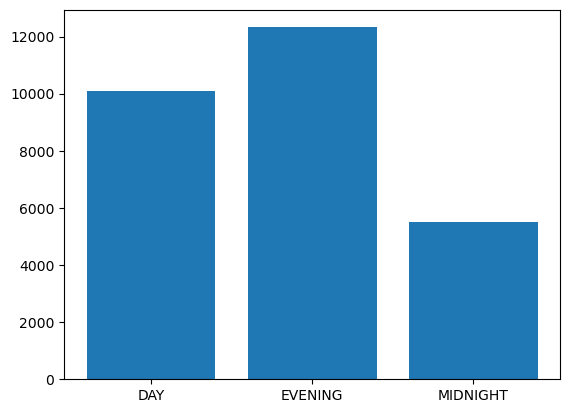

In [4]:
plt.bar(C.index, C.OBJECTID)
plt.xticks(C.index, C.SHIFT)

<BarContainer object of 3 artists>

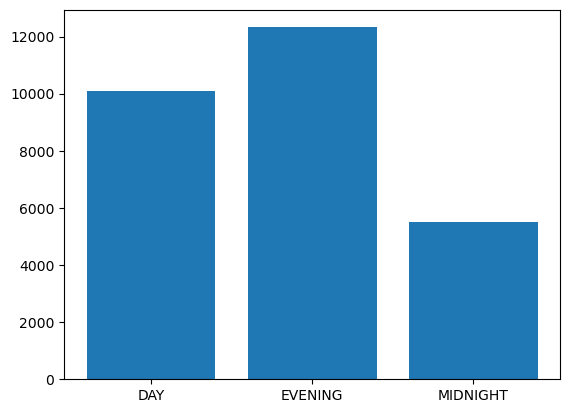

In [5]:
plt.bar(C.SHIFT, C.OBJECTID)

#### Make the graph look pretty

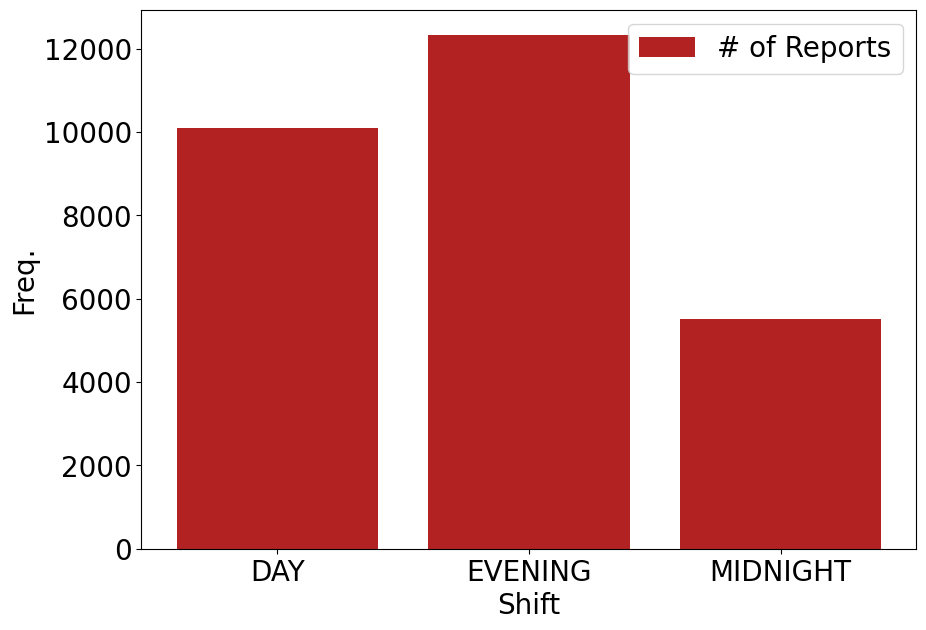

In [6]:
plt.figure(figsize=(10,7)) # Define the size of the graph

plt.bar(C.index, C.OBJECTID, label = "# of Reports", 
        color="firebrick") # Define the figure object

plt.xticks(C.index, C.SHIFT, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Shift", fontsize=20)
plt.ylabel("Freq.", fontsize=20)

plt.legend(fontsize=20)

plt.savefig("barplot.png", bbox_inches="tight")

#### Try it yourself with METHOD
Create a bar chart on the METHOD column.
Named colors: https://matplotlib.org/stable/gallery/color/named_colors.html

In [7]:
## step one: create the summary we want to plot
M = method_count = df.METHOD.value_counts()
method_count

METHOD
OTHERS    25256
GUN        2034
KNIFE       641
Name: count, dtype: int64

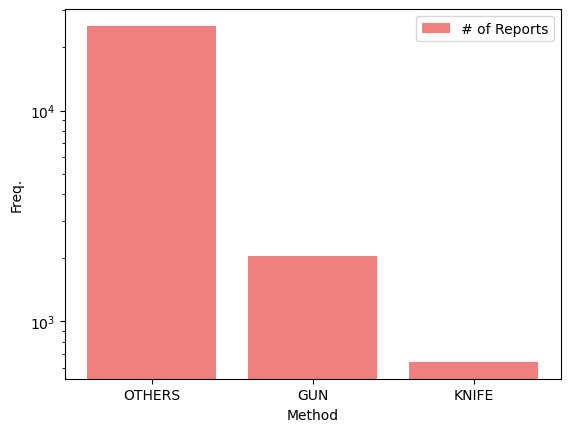

In [41]:
plt.bar(M.index, M.values, color = "lightcoral", label = "# of Reports")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Method", fontsize=10)
plt.ylabel("Freq.", fontsize=10)

plt.legend(fontsize=10)

plt.yscale("log")

# Histograms and Densities

(array([  38.,  150.,  292.,  515.,  866.,  776., 1261., 2622., 4521.,
        2440., 2251., 3053., 3071., 1829.,  906.,  789.,  849.,  853.,
         649.,  200.]),
 array([-77.11364471, -77.10346988, -77.09329506, -77.08312024,
        -77.07294541, -77.06277059, -77.05259577, -77.04242094,
        -77.03224612, -77.0220713 , -77.01189647, -77.00172165,
        -76.99154683, -76.981372  , -76.97119718, -76.96102236,
        -76.95084753, -76.94067271, -76.93049789, -76.92032306,
        -76.91014824]),
 <BarContainer object of 20 artists>)

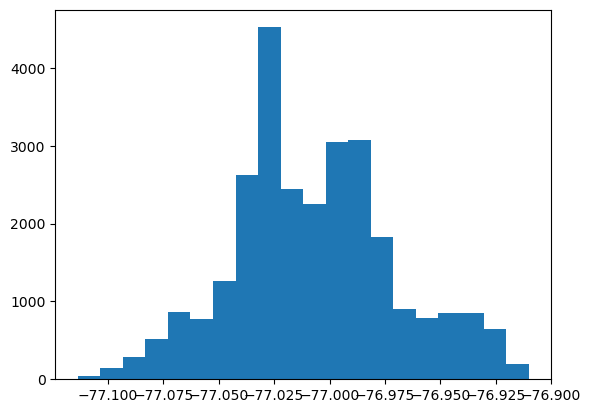

In [9]:
plt.hist( df.X, bins=20 )

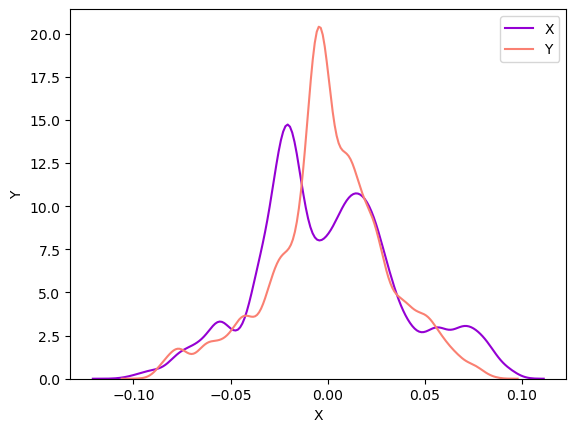

In [29]:
sns.kdeplot( df.X - df.X.mean(), color = "darkviolet")
sns.kdeplot( df.Y - df.Y.mean(), color = "salmon")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["X", "Y"])

#### Your Turn: Add labels (X and Y), plot the legend, and change the color of your density
- What are the differences in distribution you observe?

Text(0.5, 0, 'try')

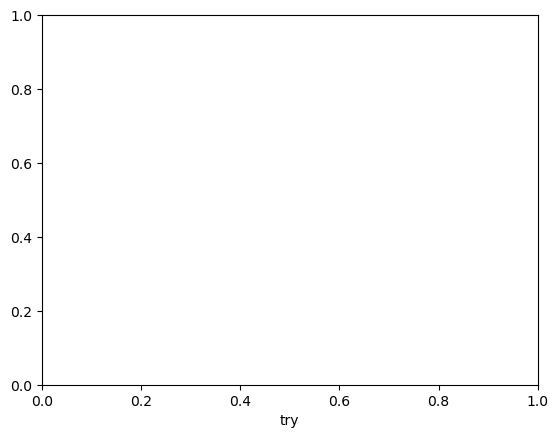

## Two dimensional density plots

<Axes: xlabel='X', ylabel='Y'>

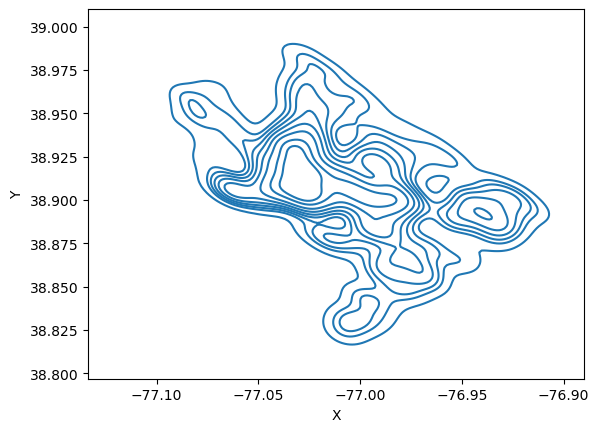

In [12]:
sns.kdeplot(x = df.X, y = df.Y)

#### Your turn: Plot the densities for WARDS 1, 2, and 3

- Sample 100 for each ward.
- Should take six lines of code. Hint: Do it for 1 first.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


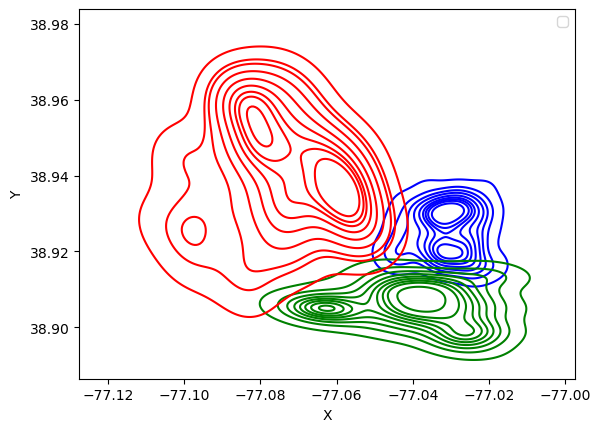

In [46]:
df1 = df[df.WARD == 1].sample(n = 100)
sns.kdeplot(x = df1.X, y = df1.Y, color = "blue", label = "WARD1")

df2 = df[df.WARD == 2].sample(n = 100)
sns.kdeplot(x = df2.X, y = df2.Y, color = "green", label = "WARD2")

df3 = df[df.WARD == 3].sample(n = 100)
sns.kdeplot(x = df3.X, y = df3.Y, color = "red", label = "WARD3")

plt.legend()

<Axes: xlabel='X', ylabel='Y'>

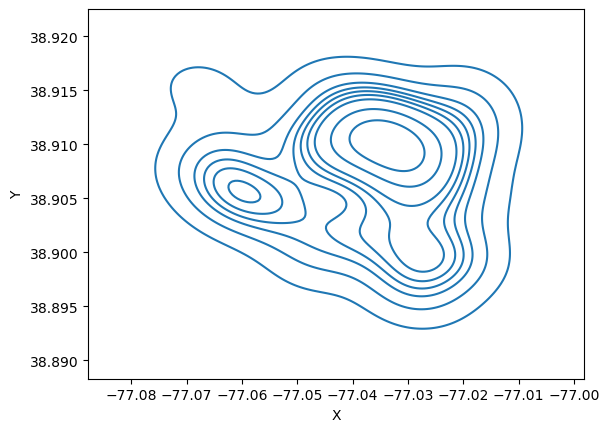

<Axes: xlabel='X', ylabel='Y'>

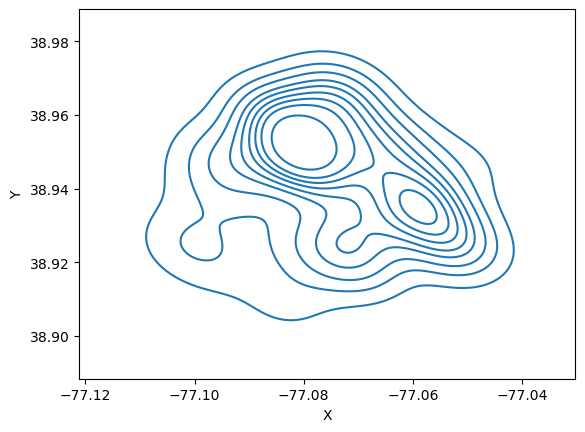

# Line Plots
**Goal**: bar plot where x axis is month; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator); want line graph to be able to see trends over time in count of reported crimes

In [37]:
df['report_month'] = pd.to_datetime(df.REPORT_DAT).dt.month
df[["REPORT_DAT", "report_month"]].sample(n = 3)

,REPORT_DAT,report_month
10229,2020/10/13 14:15:43+00,10
5766,2020/12/18 15:35:04+00,12
26672,2020/11/05 17:30:45+00,11


In [14]:
# pd.to_datetime(df.REPORT_DAT).dt.year

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
27926    2020
27927    2020
27928    2020
27929    2020
27930    2020
Name: REPORT_DAT, Length: 27931, dtype: int32

In [15]:
df.sample(frac = 0.1) # 10% of whole data
df.sample(frac = 1) # randomize the whole data

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,report_month
12377,-77.069767,38.931676,20115784,2020/08/13 22:13:43+00,EVENING,OTHERS,THEFT F/AUTO,3500 - 3599 BLOCK OF WOODLEY ROAD NW,393951.00,140423.00,...,600.0,Precinct 27,38.931668,-77.069765,NaN,2020/08/13 13:00:45+00,2020/08/13 17:00:52+00,595841724,NaN,8
2476,-77.044190,38.900456,20037675,2020/03/02 19:17:08+00,DAY,OTHERS,THEFT/OTHER,1900 - 1999 BLOCK OF PENNSYLVANIA AVENUE NW,396167.00,136956.00,...,10700.0,Precinct 17,38.900448,-77.044188,GOLDEN TRIANGLE,2020/03/02 17:27:30+00,2020/03/02 17:30:27+00,595566051,NaN,3
15533,-77.005401,38.879914,20075072,2020/05/21 05:10:34+00,MIDNIGHT,OTHERS,BURGLARY,800 - 899 BLOCK OF NEW JERSEY AVE SE,399531.54,134674.78,...,7202.0,Precinct 131,38.879907,-77.005399,CAPITOL RIVERFRONT,2020/05/21 02:23:47+00,2020/05/21 05:10:48+00,595865210,NaN,5
23916,-76.981967,38.921939,20060763,2020/04/19 08:07:17+00,MIDNIGHT,KNIFE,ASSAULT W/DANGEROUS WEAPON,1500 - 1699 BLOCK OF MONTANA AVENUE NE,401564.00,139340.00,...,9102.0,Precinct 72,38.921931,-76.981964,NaN,2020/04/19 06:00:53+00,2020/04/19 06:04:33+00,596069032,NaN,4
22049,-77.031962,38.908045,20165610,2020/11/20 03:17:30+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,1300 - 1399 BLOCK OF 14TH STREET NW,397228.00,137798.00,...,5003.0,Precinct 17,38.908037,-77.031960,NaN,2020/11/19 23:26:40+00,2020/11/19 23:56:37+00,596052857,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,-77.026618,38.984482,20128708,2020/09/09 00:53:12+00,EVENING,OTHERS,THEFT F/AUTO,7816 - 7899 BLOCK OF GEORGIA AVENUE NW,397694.00,146283.00,...,1600.0,Precinct 62,38.984474,-77.026616,NaN,2020/09/08 15:30:16+00,2020/09/08 16:10:27+00,595569928,NaN,9
18169,-77.027570,38.910370,20401226,2020/08/18 01:15:54+00,EVENING,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF RHODE ISLAND AVENUE NW,397609.00,138056.00,...,5001.0,Precinct 17,38.910363,-77.027568,NaN,2020/08/17 12:00:00+00,2020/08/18 00:00:00+00,595898977,NaN,8
24178,-76.926460,38.881019,20078791,2020/05/28 17:12:56+00,DAY,OTHERS,SEX ABUSE,5133 - 5300 BLOCK OF FITCH STREET SE,406381.00,134800.00,...,7707.0,Precinct 105,38.881012,-76.926458,NaN,2020/05/28 01:00:01+00,2020/05/28 01:30:17+00,596072050,NaN,5
21388,-76.997316,38.898915,20004374,2020/01/08 17:54:37+00,DAY,OTHERS,ROBBERY,600 - 699 BLOCK OF G STREET NE,400233.00,136784.00,...,8302.0,Precinct 83,38.898907,-76.997314,NaN,2020/01/08 15:53:18+00,2020/01/08 17:55:00+00,596046614,NaN,1


In [16]:
### Group by month and find unique reports; same syntax as above

C = count_bymonth = df.groupby('report_month')['OBJECTID'].nunique().reset_index()
C

,report_month,OBJECTID
0,1,2950
1,2,2540
2,3,2202
3,4,1652
4,5,1834
5,6,2276
6,7,2134
7,8,2433
8,9,2570
9,10,2563


Text(0, 0.5, 'Frequency')

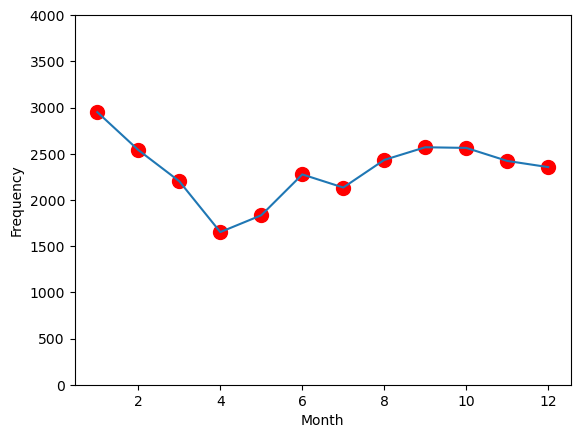

In [38]:
plt.plot(C.report_month, C.OBJECTID)

plt.scatter(C.report_month, C.OBJECTID, 
            s=100, c="red")

plt.ylim(0,4000)
plt.xlabel("Month")
plt.ylabel("Frequency")

#### Your Turn: Now add the appropriate x and y labels following the same logic as the bar graph

# Read on if you have experience with R & ggplot (and prefer it)
This is here for a quick reference in how to use R-based ggplot in python. 
I almost only use Python, but this is personal preference.

### Other ways to create bars

In [18]:

## one way: plot and display in notebook
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) + # base layer with data and x and y axis 
            geom_bar(stat = "identity", fill = "firebrick") + # telling it to expect a bar chart; identity
             # arg just means to use the y value 
            theme_classic() + # aesthetics
            xlab("Which shift?") + # custom label for x axis
            ylab("Count of crimes") + # custom label for y axis
            theme(axis_text = element_text(size = 14, color = "black"))) # make font bigger


NameError: name 'ggplot' is not defined

In [ ]:

## another way: save to png- right now,
## it's writing to same path our df is stored in; 
plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)


## what happens if we don't specify theme or color of bars? diff aesthetics
## also doesnt give us informative x and y labels (for pset please give 
## informative labels)
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity"))

## Plot type two: line graph

In [ ]:
## group by month and find unique reports
### first, extract month from report_dat (just 
### with the noncleaned version)

dc_crim_2020['report_month'] = pd.to_datetime(dc_crim_2020.REPORT_DAT,
                                             errors = "coerce").dt.month
### double check this worked
dc_crim_2020[["REPORT_DAT", "report_month"]].sample(n = 3)

### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
count_bymonth = pd.DataFrame(dc_crim_2020.groupby('report_month')['OBJECTID'].nunique()).reset_index()
count_bymonth


In [ ]:

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line() +
            ylim(0, 3500) +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)))

## Making more complex: adding facets

What if we want to create the above but visualize separately for each ward?

Can group by two variables (see lecture slide) and add a line to facet_wrap

In [ ]:
### add ward as grouping var
count_bymonth_byw = pd.DataFrame(dc_crim_2020.groupby(['report_month',
                                                   'WARD'])['OBJECTID'].nunique()).reset_index()
count_bymonth_byw.head()
count_bymonth_byw.tail()

## make the facetting var prettier 
## by noting "Ward" before the
count_bymonth_byw['WARD_name'] = 'Ward: ' + count_bymonth_byw.WARD.astype(str)

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line(color = "red") +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            facet_wrap('WARD_name', ncol = 2) + # ADDITIONAL LINE 
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() # using 538 theme 
            ) 

In [ ]:
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID', group = 'factor(WARD)', color = 'factor(WARD)')) +
            geom_line() +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() + # using 538 theme +
             labs(color = "Ward") +
             ylim(0, 700)
            ) 